# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.


### Events:
1. Birth X→X+1
2. Transmission Y→Y+ 1 and X→X−1
3. Recovery Y→Y−1 and Z→Z+1
4. Death, three independent events, X→X − 1, Y → Y− 1, Z→Z−1

In [4]:
import numpy as np
import matplotlib.pyplot as plt


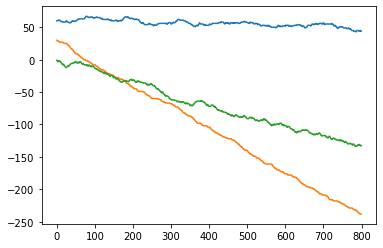

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initialize variables
beta = 1/3
gamma = 0.0001
mu = 0.02
N = 100
X = 60
Y = 30
Z = 0
T = 0

# Label events
E1, E2, E3, E4, E5, E6 = [1,2,3,4,5,6]

# Get random numbers
for i in range(6):
    r = np.random.rand()

def get_rates(X, Y, Z):
    """
    Determine at which rate an event occurs
    """
    rate_E1 = mu * N
    rate_E2 = beta * X * Y / N
    rate_E3 = gamma * Y
    rate_E4 = mu * X
    rate_E5 = mu * Y 
    rate_E6 = mu * Z
    
    events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6]
        
    return events
    


def gillespie(X, Y, Z, T):
    """
    Choose the next time and event
    """

    # Generate two random numbers between 0 and 1.
    random_time = np.random.rand()
    random_event = np.random.rand()
    
    events = get_rates(X, Y, Z)
    
    Rtotal = sum(events)

    # Get reaction time.
    # T = -1 * np.log(random_time) / Rtotal
    tau = (1.0/Rtotal) * np.log(float(1.0/random_time))
    T += tau
    
    # TODO: Determine which event occurs 
#     rates = []
#     for i in events:
#         rates.append(i/Rtotal)
        
#     rates = np.sort(rates) 
#     for j in range(1, len(rates)):
#         if random_event <= 1/j:
#             print(random_event, j - 1, "J")
#             index = j - 1
            
#     print(indexes)
#     index = indexes
    index = np.random.rand() * len(events)
        
    # Birth
    if index >= 0 and index <= 1:
        X += 1

    # Transmission
    elif index < 1:
        Y += 1
        X -= 1

    # Recovery
    elif index < 2:
        Z += 1
        Y -= 1

    # Death 
    elif index < 3:
        X -= 1
    elif index < 4:
        Y -= 1
    else:
        Z -= 1
    
    return X, Y, Z, T


    
plots = []
for i in range(800):
    X, Y, Z, T = gillespie(X, Y, Z, T)
    plots.append([X, Y, Z])

plt.plot(plots)
plt.show()

